# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import seaborn as sns



In [29]:
  
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv') 
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [30]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C


In [32]:
df_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df_transform=df_raw.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [35]:
# dos variables nuevas
df_transform['Sex_encoded']=df_transform['Sex'].apply(lambda x: 1 if x=="female" else 0)

In [36]:
df_transform['Embarked_S']=df_transform['Embarked'].apply(lambda x: 1 if x=="S" else 0)

In [37]:
df_transform['Embarked_C']=df_transform['Embarked'].apply(lambda x: 1 if x=="C" else 0)

In [38]:
df_transform['Age_clean']=df_transform['Age'].fillna(30)

In [39]:
df_transform=df_raw.drop(['Age'],axis=1)

In [40]:
df=df_transform.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [42]:
X=df.drop(['Survived'],axis=1)

In [43]:
y=df['Survived']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70)

In [45]:
X_train.describe()

,PassengerId,Pclass,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,668.000000,668.000000
mean,443.464072,2.324850,0.482036,0.371257,31.951222
std,258.474994,0.838099,1.014723,0.810286,51.201019
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,216.500000,2.000000,0.000000,0.000000,7.895800
50%,444.500000,3.000000,0.000000,0.000000,14.454200
75%,667.250000,3.000000,1.000000,0.000000,30.178100
max,891.000000,3.000000,8.000000,5.000000,512.329200


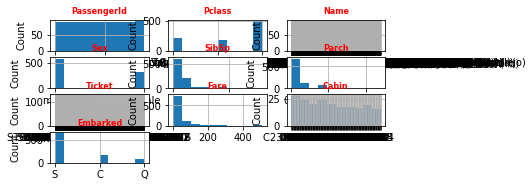

In [46]:
for index, i in enumerate(X):
    plt.subplot(6,3,index+1) 
    df1=df[i].hist()
    df1.plot(kind='bar')
    plt.title(f"{i}", fontsize=8, color= 'red', fontweight='bold')
    plt.ylabel('Count')
plt.Figure(figsize=(16,16))    
plt.show()

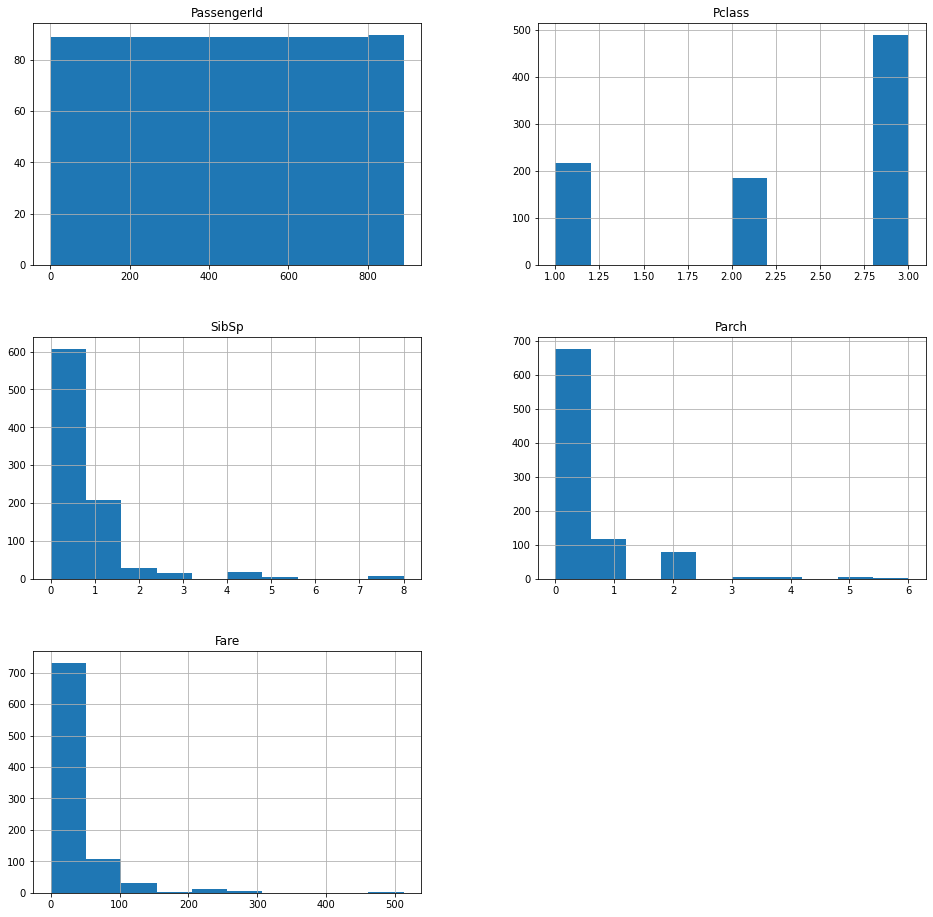

In [47]:
X.hist(figsize=(16,16))
plt.show()

In [48]:
# grafica de boxplot



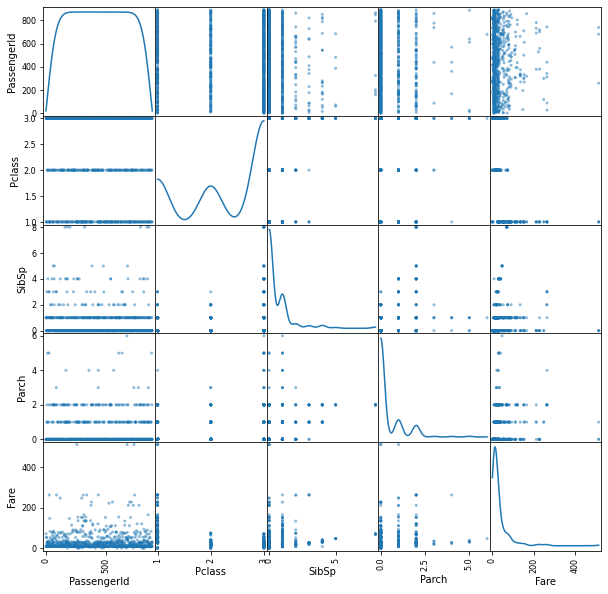

In [49]:
# scatter matrix

pd.plotting.scatter_matrix(X, diagonal='kde',figsize=(10,10))
plt.show()

In [50]:
# hacemos el calculo de la correlacion vemos que hay correlaciones
# En caso que sea mayor que 0.7 me quedo con una de las 2
# aca es -0.54

X.corr()

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.159651,0.216225,1.000000


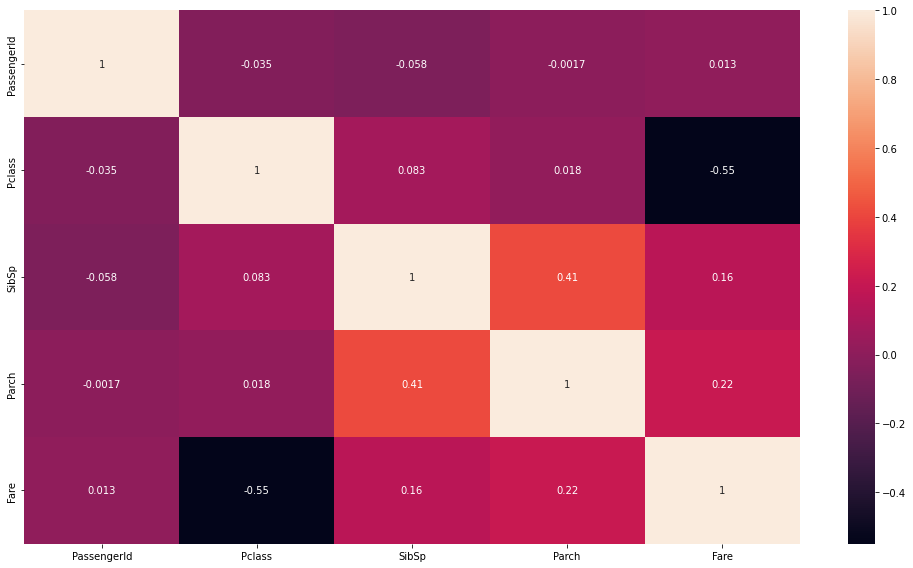

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(), annot=True)
plt.tight_layout()

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [53]:
classifier = RandomForestClassifier(random_state=1107)

In [ ]:
# Problemas con las columas Age y AgeCleaned